### Notebook Imports

In [45]:
# Notebook Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm  # color map 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Get and explore what's inside dataset
[Link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [3]:
b_data = load_boston()
dir(b_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print( b_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data exploration with pandas

In [5]:
#create a dataframe with provided components
data = pd.DataFrame(data = b_data.data, columns= b_data.feature_names)

# add price column
data['PRICE'] = b_data.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data visualisation

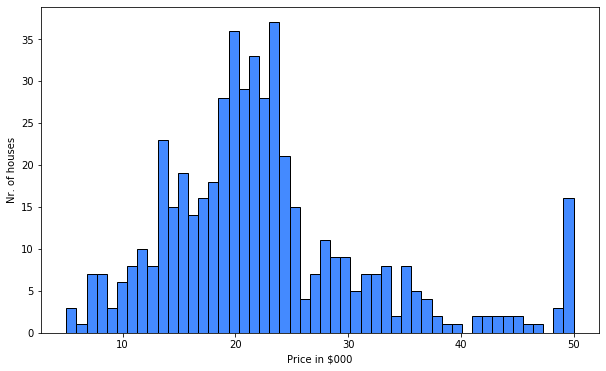

In [7]:
# create a hisogram for house prices
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#448AFF')
plt.xlabel('Price in $000')
plt.ylabel('Nr. of houses')
plt.show()

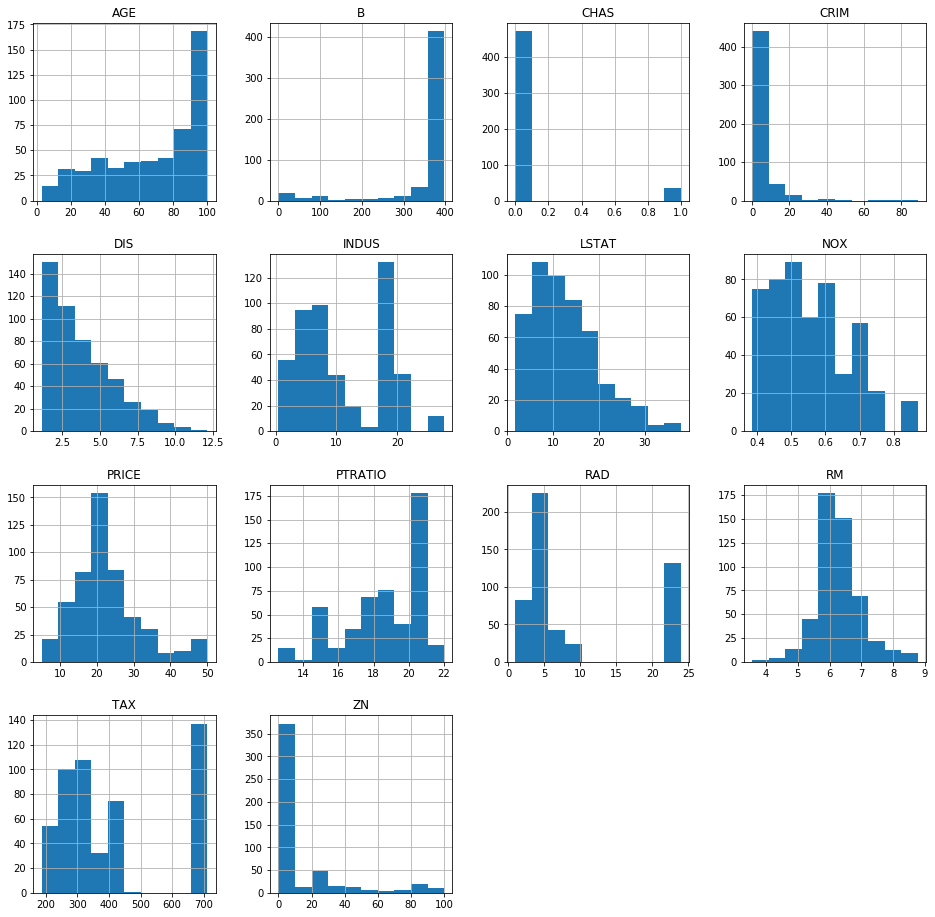

In [8]:
# Plot a histogram for all features to explore the  features' distribution
data.hist(figsize= (16, 16))
plt.show()

## Training and test Dataset Split 

In [9]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=12)

## Develop a quick "black box" model
I'll train an XGBoost Algorithm without feature engineering nor model tuning. Then a Linear Regression model will be created and enhanced on the hope that it can match or surpass the performance of the XGB model

In [10]:
xgb_reg = XGBRegressor(random_state= 12)
xgb_reg.fit(X_train, y_train)

[16:22:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\peter\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=12,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [11]:
print('Training data r-squared:', round(xgb_reg.score(X_train, y_train),4))
print('Test data r-squared:', round(xgb_reg.score(X_test, y_test),4))

Training data r-squared: 0.9792
Test data r-squared: 0.8646


## Multivariable Regression

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.736159238423712
Test data r-squared: 0.7484031678924561


## Feature Engineering

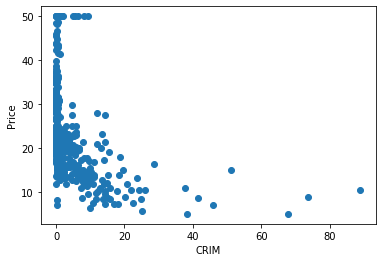

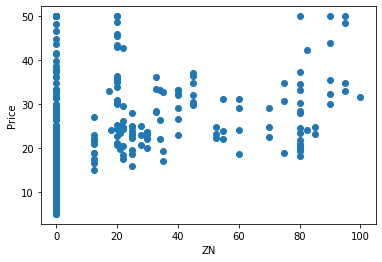

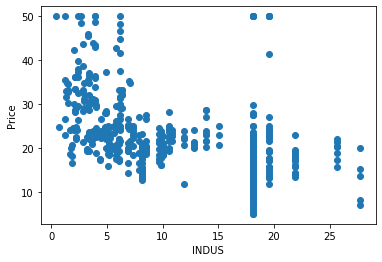

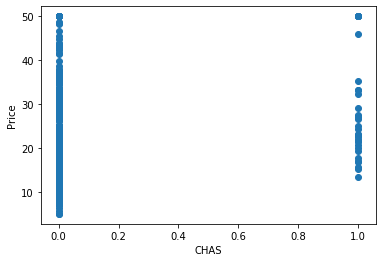

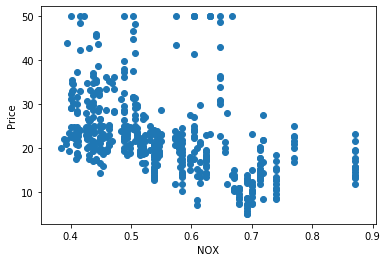

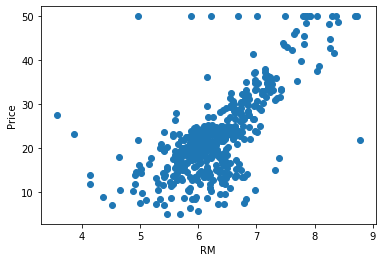

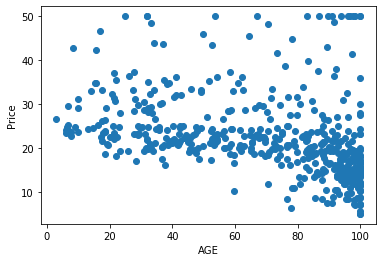

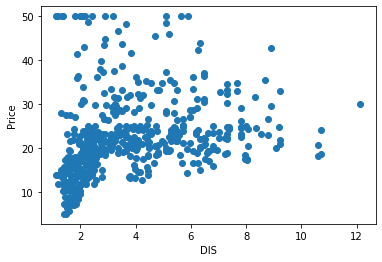

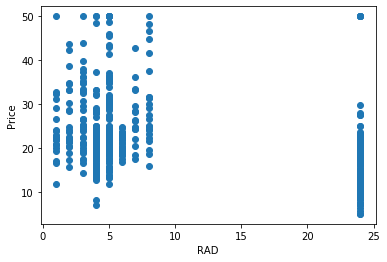

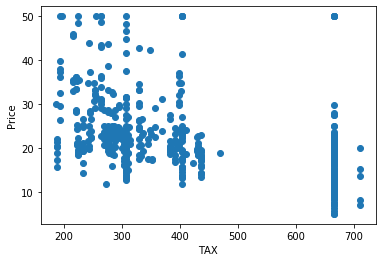

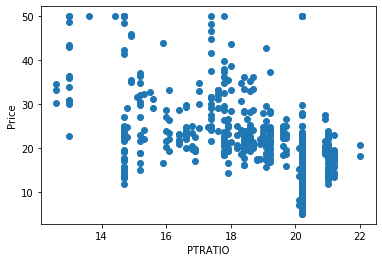

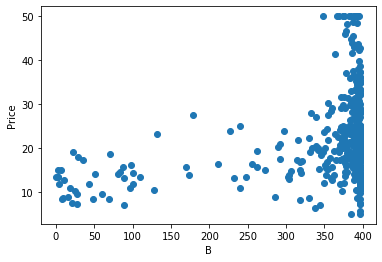

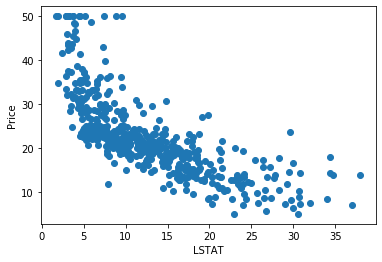

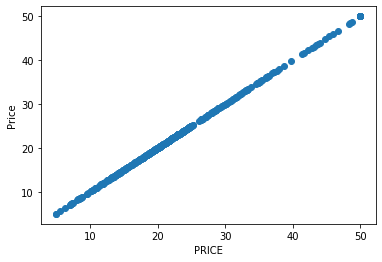

In [29]:
for i in range(0, 14):
    feature = i
    plt.scatter(x= data.iloc[:, feature:feature+1], y = data['PRICE'])
    plt.xlabel (data.columns[feature])
    plt.ylabel ('Price')
    plt.show()

In [57]:
sc = MinMaxScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled  = sc.transform(X_test)

X_train_scaled =  pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled  =  pd.DataFrame(X_test_scaled, columns= X_train.columns)

In [58]:
# Regression with Feature scaling
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

print('Training data r-squared:', regr.score(X_train_scaled, y_train))
print('Test data r-squared:', regr.score(X_test_scaled, y_test))

Training data r-squared: 0.7361592384237121
Test data r-squared: 0.748403167892453


In [66]:
# Regression with Feature scaling and target log transformation

regr.fit(X_train_scaled, np.log(y_train))

print('Training data r-squared:', regr.score(X_train_scaled, np.log(y_train)))
print('Test data r-squared:', regr.score(X_test_scaled, np.log(y_test)))

Training data r-squared: 0.801171115538954
Test data r-squared: 0.7264247461373395


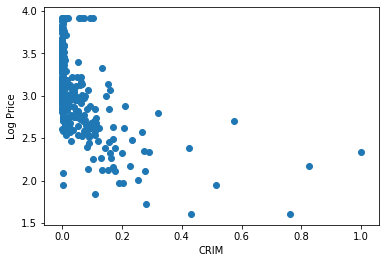

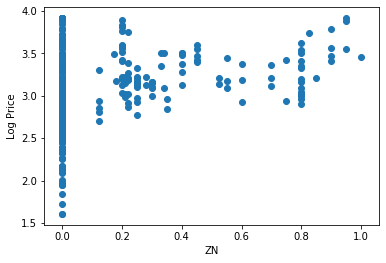

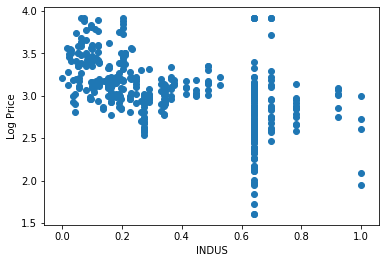

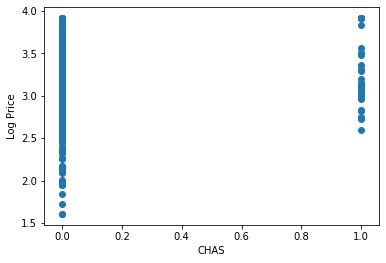

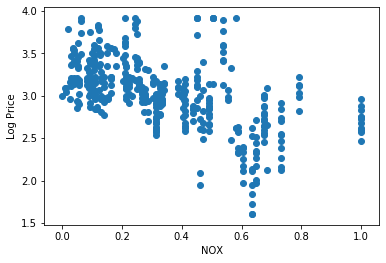

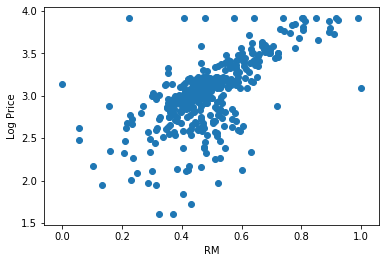

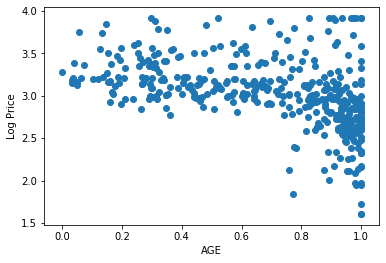

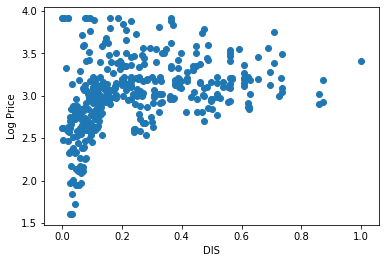

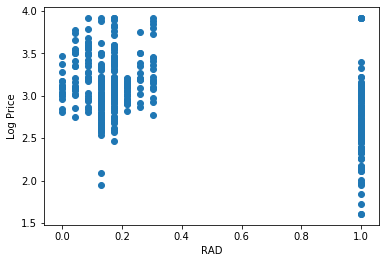

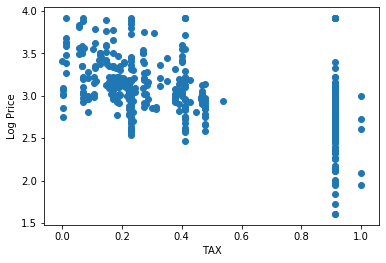

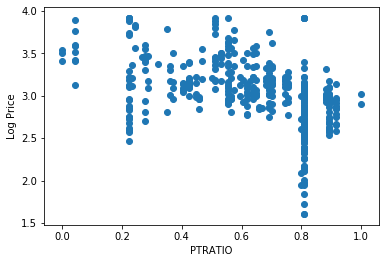

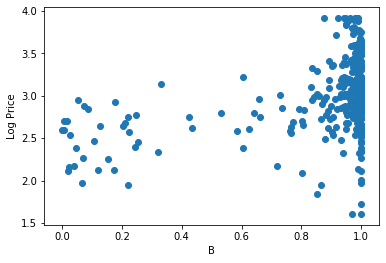

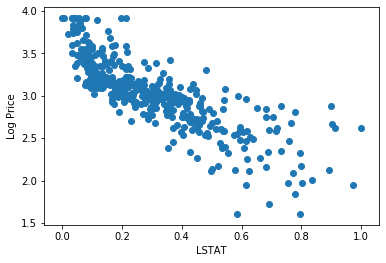

In [67]:
for i in range(0, 13):
    feature = i
    plt.scatter(x= X_train_scaled.iloc[:, feature:feature+1], y = np.log(y_train))
    plt.xlabel (X_train_scaled.columns[feature])
    plt.ylabel ('Log Price')
    plt.show()